In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
# Избегайте неточных плавающих значений (например, для обратных матриц в точечном произведении).
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha)

# Введение

Разберем, как графически представлять системы уравнений, как интерпретировать количество решений системы, что такое линейная комбинация и многое другое. Будем использовать Numpy/Matplotlib в качестве инструмента для экспериментов с этими концепциями.

# Линейная зависимость и размах

Поскольку речь идет о системах линейных уравнений, начнем с набора уравнений:

$$
{Ax}={b}
$$.

Это соответствует 

$$ A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n = b_n$$.


Таким образом, у нас есть несколько уравнений с несколькими неизвестными. Мы знаем $A_{1,1}...A_{m,n}$ и $b_1...b_n$. Чтобы решить систему, нужно найти такие значения переменных $ x_1...x_n$, которые удовлетворяют всем уравнениям.


#Количество решений

Первое, что нужно выяснить, столкнувшись с такой системой уравнений: каково количество решений?

Число решений системы уравнений ${Ax}={b}$ можно представить в трех случаях:

<li> нет решений,
<li> 1 решение,
<li> бесконечное число решений.
<br>

### Почему не может быть больше 1 решения и меньше бесконечного числа решений?

### Предположение

Просто потому, что мы имеем дело с линейными системами! Две прямые не могут пересекаться более одного раза.

Чтобы наглядно представить это, возьмем два измерения и два уравнения. Решения системы соответствуют пересечению прямых. Первый вариант - две прямые никогда не пересекаются (параллельны). Другой вариант - они пересекаются один раз. И, наконец, последний вариант - они пересекаются везде (накладываются).

-----

*Система уравнений не имеет решения, имеет 1 решение или бесконечное число решений. Две прямые не могут пересекаться более одного раза, но могут быть параллельными или наложенными друг на друга.*

------

### Доказательство

Представим, что $x$
 и $y$
 это два решения нашей системы. Это означает, что

 $$
 \begin{cases}
{Ax}={b}\\\\
{Ay}={b}
\end{cases}
$$.

-----

В этом случае мы увидим, что ${z}=\alpha {x} + (1-\alpha {y})$
 также является решением для любого значения 
$\alpha$. Если $z$  является решением, то можно сказать, что $Az=b$. Действительно, если мы подставим $z$
 в левую часть уравнения, то получим:


$$
\begin{align*}
{Az}&={A}(\alpha x + (1-\alpha y))\\\\
    &={Ax}\alpha + {A}(1-\alpha y)\\\\
    &={Ax}\alpha + {Ay}(1-\alpha)
\end{align*}
$$.

А поскольку $Ax=Ay=b$. Это приводит к:


$$
\begin{align*}
{Az}&={b}\alpha + {b}(1-\alpha)\\\\
    &={b}\alpha + {b}-{b}\alpha\\\\
    &={b}
\end{align*}
$$.

# Матричное представление системы

Как было замечено, уравнение ${Ax}={b}$
 может быть представлено матрицей $A$
 содержащей веса каждой переменной, и вектором $x$ 
 содержащим каждую переменную. Произведение $A$
 и $x$
 дает $b$
 который является другим вектором размера 
$m$:


$$ \begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
\times
\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
=
\begin{bmatrix}
    b_1 \\\\
    b_2 \\\\
    \cdots \\\\
    b_m
\end{bmatrix}$$

Что соответствует набору линейных уравнений:

$$
A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n = b_n
$$

-----

Вот несколько интуитивных представлений о том, что представляют собой эти матрицы. Количество столбцов $A$
 это число измерений нашего векторного пространства. Это число 
 направлений, по которым мы можем двигаться. Количество решений нашей линейной системы соответствует количеству способов, которыми мы можем достичь $b$
 перемещаясь по различным 
 измерения.

Но чтобы понять это, нужно подчеркнуть, что для представления системы уравнений существуют два варианта: *строка* и *столбец*.


## Строчный формат

Формат строки, возможно, более привычен, потому что это представление используется, когда у существует только одно уравнение. Его можно распространить на бесконечное число уравнений и неизвестных (даже если будет трудно представить 9-мерную гиперплоскость в 10-мерном пространстве...).

-----

Было сказано, что решениями линейной системы уравнений являются наборы значений $x_1...x_n$
 которые удовлетворяют всем уравнениям, то есть значениям, принимаемым неизвестными. Например, в случае, когда 
$A$ является ($2 \times 2$
) матрицей ($n = m = 2$
) уравнения соответствуют линиям в двумерном пространстве, а решением системы является пересечение этих линий.

------


Обратите внимание, что привязка одного направления в пространстве к одному параметру - это только один из способов представления уравнений. Существует множество способов представления систем с более чем с 3 параметрами. Например, можно добавить цвета, чтобы получить представление четвертого измерения. Все дело в представлении

## Переопределенные и недоопределенные системы

Линейную систему уравнений можно рассматривать как набор $n-1$ -мерных гиперплоскостей в n-мерном пространстве. Таким образом, линейная система может быть охарактеризована количеством уравнений ($m$) и количеством неизвестных переменных ($n$).


<li>Если уравнений больше, чем неизвестных, то система называется переопределенной. В следующем примере представлена система из 3 уравнений (изображенных 3 линиями) и 2 неизвестных (соответствующих 2 измерениям). В этом примере нет решения, так как не существует точки, принадлежащей трем прямым:


<li>Если неизвестных больше, чем уравнений, система называется недоопределенной. На следующем рисунке только 1 уравнение (1 линия) и 2 измерения. Каждая точка, лежащая на линии, является решением системы. В этом случае существует бесконечное число решений:

## Пример 1

$m=1, n=2$
1 уравнение и 2 переменные

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1
$$.

Графическая интерпретация $n=2$
 заключается в том, что имеется двумерное пространство. Поэтому можно изобразить его с помощью двух осей. Поскольку наша гиперплоскость имеет размерность $n-1$, получается одномерная гиперплоскость. Это просто линия. Поскольку $m=1$, у нас есть только одно уравнение. Это означает, что у нас есть только одна линия, характеризующая нашу линейную систему.

-------

Обратите внимание, что последнее уравнение можно записать и более привычным способом

$$
y = ax + b
$$

при этом $y$
 соответствует 
$x_2$, $x$ 
 соответствующий 
$x_1$, $a$ 
 соответствующий 
$A_{1,1}$ и $A_{1,2} =1$.

Для первого примера возьмем следующее уравнение:

$$
y = 2x+1
$$.

Нарисуем линию этого уравнения с помощью Numpy и Matplotlib

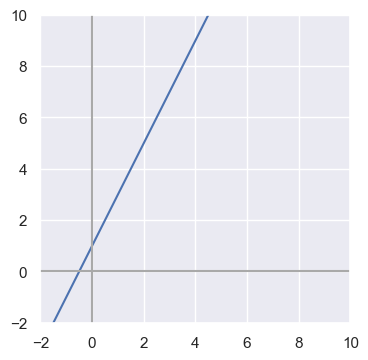

In [8]:
x = np.arange(-10, 10)
y = 2*x + 1

plt.figure()
plt.plot(x, y)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

### Решения
Решения этой линейной системы соответствуют значению $x$
 и $y$
 например, $y=2x+1$
. Графически это соответствует каждой точке на прямой, поэтому решений может быть бесконечное множество. Например, одно из решений - $x=0$
 и $y=1$
или $x=1$
 и $y=3$
 и так далее

### Пример 2

m=2, n=2, **2 уравнения и 2 неизвестных**

$$ A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2$$

-----

Графическая интерпретация этой системы заключается в том, что у нас по-прежнему есть линии в двумерном пространстве. Однако на этот раз линий две, так как уравнений два.

Рассмотрим эти уравнения в качестве примера

$$ \begin{cases}
y = 2x + 1\\\\
y = 6x - 2
\end{cases}$$

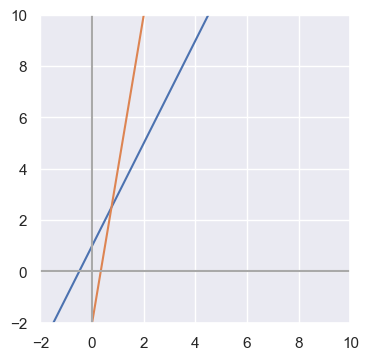

In [4]:
x = np.arange(-10, 10)
y = 2*x + 1
y1 = 6*x - 2

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

Итак, для двух линий в двумерном пространстве существует множество возможных вариантов. На рисунке выше две линии пересекаются, поэтому существует одно единственное решение. Если они наложены друг на друга (одно и то же уравнение или эквивалентное, см. линейную зависимость ниже), то существует бесконечное количество решений, так как каждая точка прямых соответствует пересечению. Если они параллельны, то решения не существует.

-----


То же самое можно наблюдать и при других значениях $m$
 (количество уравнений) и (количество измерений). Например, две двумерные плоскости в трехмерном пространстве могут быть наложены друг на друга (бесконечно много решений), пересекаться (бесконечно много решений, так как их пересечение - прямая) или быть параллельными (нет решения).

### Пример 3

m=3, n= 2 **3 уравнения и 2 неизвестных**

$$ A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2\\\\
A_{3,1}x_1 + A_{3,2}x_2 = b_3$$.

Та же идея работает и в случае более чем 2 уравнений в двумерном пространстве. В этом примере получается 3 уравнения:

$$ \begin{cases}
y = 2x + 1\\\\
y = 6x - 2\\\\
y = \frac{1}{10}x+6
\end{cases}$$

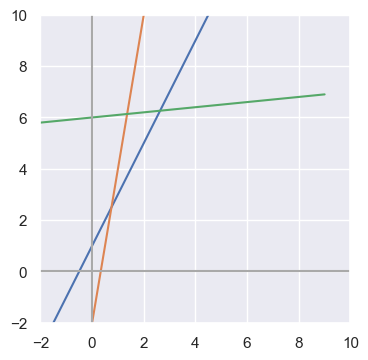

In [5]:
x = np.arange(-10, 10)
y = 2*x + 1

y1 = 6*x - 2
y2 = 0.1*x+6

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

В приведенном выше случае есть 3 уравнения, но нет решения, потому что в пространстве нет точки, которая лежала бы на каждой из этих прямых.

# Линейная комбинация

Линейная комбинация двух векторов соответствует их взвешенной сумме.

## Пример 4


Возьмем два вектора

$$ \vec{u}=
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}$$

и

$$ \vec{v}=
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}$$


-----

Эти два вектора имеют размерность 2 и, следовательно, содержат координаты в двумерном пространстве.

Линейная комбинация $\vec{u}$ и $\vec{v}$ равна

 $$ a\vec{u}+b\vec{v}= a
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} + b\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}$$

$a$ и $b$ - веса векторов.

-------

Графически векторы складываются, чтобы достичь определенной точки в пространстве. Например, если $a=2$ и $b=1$
:

 $$ 2\vec{u}+\vec{v}= 2
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} +
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix} =
\begin{bmatrix}
    2 \cdot 1 + 2 \\\\
    2 \cdot 3 + 1
\end{bmatrix} =
\begin{bmatrix}
    4 \\\\
    7
\end{bmatrix}$$
 
 
 
Сумма $\vec{u}$ и $\vec{v}$ - это вектор, который достигнет точки кординат $(4,7)$. Чтобы показать это на графике, воспользуемся пользовательской функцией `plotVectors()`, которую определили в начале блокнота. Она принимает на вход набор координат и массив цветов и строит график соответствующих векторов. Итак, построим графики $\vec{u}$
 и $\vec{v}$:



(0.0, 5.0)

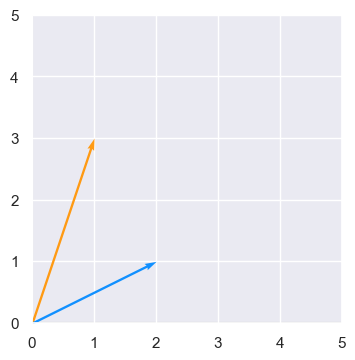

In [9]:
orange = '#FF9A13'
blue = '#1190FF'
plotVectors([[1, 3], [2, 1]], [orange, blue])
plt.xlim(0, 5)
plt.ylim(0, 5)

Далее сложим векторы с учетом коэффициентов:

In [ ]:
# Веса векторов
a = 2
b = 1
# Начальные и конечные координаты векторов
u = [0,0,1,3]
v = [2,6,2,1]

plt.quiver([u[0], a*u[0], b*v[0]],
           [u[1], a*u[1], b*v[1]],
           [u[2], a*u[2], b*v[2]],
           [u[3], a*u[3], b*v[3]],
           angles='xy', scale_units='xy', scale=1, color=[orange, orange, blue])
plt.xlim(-1, 8)
plt.ylim(-1, 8)
# Оси
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(4,7,marker='x',s=50)
# ИМена векторов
plt.text(-0.5, 2, r'$\vec{u}$', color=orange, size=18)
plt.text(0.5, 4.5, r'$\vec{u}$', color=orange, size=18)
plt.text(2.5, 7, r'$\vec{v}$', color=blue, size=18)
plt.show()
plt.close()

В итоге получаем координату (4,7).

# Оболочка (размах)

Возьмем векторы $\vec{u}$ и $\vec{v}$ из предыдущего примера и подумаем, в какие точки можно попасть, изменив их комбинацию на $a$ и $b$. Это множество точек является размахом (оболочкой) множества векторов $\{\vec{u},\vec{v}\}$.

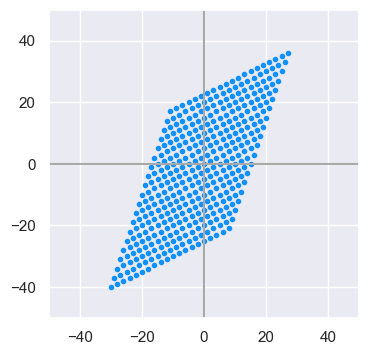

In [23]:
# Определим векторы v и u
u = [1, 3]
v = [2, 1]

# Построение выборки из множества точек, лежащих в интервале u и v
for a in range(-10, 10):
    for b in range(-10, 10):
        plt.scatter(u[0] * a + v[0] * b, u[1] * a + v[1] * b, marker='.', color=blue)

# Оси
plt.xlim(-50, 50)
plt.ylim(-50, 50)

plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')

plt.show()
plt.close()

# Пространства и подпространства

Пространство вектора определяет все значения, которые может принимать этот вектор. Векторные пространства обозначаются $\mathbb{R}$, так как значения являются вещественными числами. При наличии нескольких измерений пространство обозначается $\mathbb{R}^n$, что соответствует количеству измерений. Например, $\mathbb{R}^2$ - это пространство обычной плоскости $x-y$, где и - вещественные числа.

-----

Если возьмем двумерную плоскость в $\mathbb{R}^3$ (3-мерном пространстве), то эта плоскость будет подпространством вашего исходного пространства $\mathbb{R}^3$. Точно так же, если вы начнете с пространства $\mathbb{R}^2$ и возьмете линию в этом пространстве, то эта линия будет подпространством исходного пространства.

-----

Линейная комбинация векторов дает векторы в исходном пространстве. Каждая линейная комбинация векторов внутри пространства останется в этом пространстве. Например, если взять 2 линии в пространстве $\mathbb{R}^2$, то любая линейная комбинация даст вектор в том же пространстве $\mathbb{R}^2$.

----

Линейная комбинация векторов дает векторы в исходном пространстве.

# Графическое представление: вектор $b$

Также можно представить систему уравнений, считая, что вектор решения $b$ соответствует линейной комбинации каждого столбца, умноженной на их веса.

Из системы уравнений:

$$ A_{1,1}x_1 + A_{1,2}x_2 + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + A_{m,n}x_n = b_m $$

Тогда форма колонны будет такой:

$$ x_1
\begin{bmatrix}
    A_{1,1}\\\\
    A_{2,1}\\\\
    A_{m,1}
\end{bmatrix}
+
x_2
\begin{bmatrix}
    A_{1,2}\\\\
    A_{2,2}\\\\
    A_{m,2}
\end{bmatrix}
+
x_n
\begin{bmatrix}
    A_{1,n}\\\\
    A_{2,n}\\\\
    A_{m,n}
\end{bmatrix}
=
\begin{bmatrix}
    b_1\\\\
    b_2\\\\
    b_m
\end{bmatrix}$$


-------

С точки зрения графики, мы должны пройти путь от начала координат (нуль на всех измерениях) до точки с координатой $b$. Столбцы $A$ указывают направления, по которым мы можем двигаться, а их веса - длину пути в этом направлении.

Столбцы $A$ определяют направления, по которым можно двигаться, а их веса - длину пути в каждом направлении.

## Пример 5.

$m=2,n=2$: 2 уравнения и 2 переменные

$$ A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2 $$

$$ \begin{cases}
y = \frac{1}{2}x+1\\\\
y = -x + 4
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{1}{2}x-y = -1\\\\
x+y=4
\end{cases}$$

-----

Матрица $A$

$${A}=
\begin{bmatrix}
    \frac{1}{2} & -1 \\\\
    1 & 1
\end{bmatrix}$$


С учетом вектора $b$:

$$ x
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix} $$

-----

Задача состоит в том, чтобы найти такое значение весов ($x$ и $y$), для которого линейная комбинация вектора


$$ \begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix} $$

и 

$$ \begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}$$

дала вектор

$$ \begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}$$

Решим систему графически, построив уравнения и найдя их пересечение:



In [ ]:
x = np.arange(-10, 10)
y = 0.5*x + 1

y1 = -x + 4

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

Видно, что решение (пересечение линий, представляющих два уравнения) равно $x=2$ и $y=2$. Это означает, что линейная комбинация имеет следующий вид:

$$ 2
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
+
2
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}$$

-----

Предположим, что

$$\vec{u}=
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}$$

и 

$$\vec{v}=
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}$$


Если говорить в терминах столбчатой фигуры, то достичь точку с координатами $(-1, 4)$ можно, если сложить два раза вектор $\vec{u}$ и два раза вектор $\vec{v}$. Давайте проверим это:

In [ ]:
u = [0,0,0.5,1]
u_bis = [u[2],u[3],u[2],u[3]]
v = [2*u[2],2*u[3],-1,1]
v_bis = [2*u[2]-1,2*u[3]+1,v[2],v[3]]

plt.quiver([u[0], u_bis[0], v[0], v_bis[0]],
           [u[1], u_bis[1], v[1], v_bis[1]],
           [u[2], u_bis[2], v[2], v_bis[2]],
           [u[3], u_bis[3], v[3], v_bis[3]],
           angles='xy', scale_units='xy', scale=1, color=[blue, blue, orange, orange])
# plt.rc('text', usetex=True)
plt.xlim(-1.5, 2)
plt.ylim(-0.5, 4.5)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(-1,4,marker='x',s=50)
plt.text(0, 0.5, r'$\vec{u}$', color=blue, size=18)
plt.text(0.5, 1.5, r'$\vec{u}$', color=blue, size=18)
plt.text(0.5, 2.7, r'$\vec{v}$', color=orange, size=18)
plt.text(-0.8, 3, r'$\vec{v}$', color=orange, size=18)
plt.show()
plt.close()

Приходим в точку (-1,4)

# Определим, имеет ли система одно и только одно решение для каждого значения $b$

Рассмотрим, как определить, имеет ли система уравнений одно единственное решение. Обратите внимание, что речь идет только об общих случаях. Эту задачу можно разбить на два условия:

1. Система должна иметь хотя бы одно решение
2. Тогда система должна иметь только одно решение

## Условие 1. Неопределенная система: система должна иметь хотя бы одно решение для каждого значения $b$ : $n\geq m$: 
Неопределенная система уравнений - это система, в которой уравнений меньше, чем неизвестных.
Если необходимо, чтобы система имела одно и только одно решение, то первое требование - $n$ не должно быть больше $m$.

Рассмотрим пример матрицы $(2 \times 3)$, которая соответствует системе из 2 уравнений с 3 неизвестными переменными:


$$ \begin{cases}
8x+y+z=1\\\\
x+y+z=1
\end{cases}$$


$$ x
\begin{bmatrix}
    8 \\\\
    1
\end{bmatrix}
+
y
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
+
z
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix} $$


## Условие 2. Переопределенная система: система должна иметь только одно решение для каждого значения $b$: $m\geq n$


Переопределенная система уравнений - это система, в которой уравнений больше, чем неизвестных.
Рисунок в виде столбца поможет понять, почему линейная система обычно не имеет решения, если (количество неизвестных) меньше, чем (количество уравнений). Добавим к приведенной выше системе 1 уравнение, чтобы в итоге получить матрицу ($3 \times 2$) (3 уравнения и 2 неизвестных):



$$ \begin{cases}
y = \frac{1}{2}x+1\\\\
y = -x + 4\\\\
y = 7x + 2
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{1}{2}x-y = -1\\\\
x+y=4\\\\
7x-y=2
\end{cases}$$

-----

Что соответствует:


$$ x
\begin{bmatrix}
    \frac{1}{2} \\\\
    1 \\\\
    7
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    1 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4 \\\\
    2
\end{bmatrix}$$

Таким образом, все еще путешествуем в двумерном пространстве (см. график пространства столбцов выше), но точка, которую ищем, определена в трех измерениях. Бывают случаи, когда третья координата не опирается на нашу двумерную плоскость $x-y$ плоскость. В этом случае решения не существует.

По сути, при движении в двумерном пространстве решение определяется тремя измерениями. Если третья координата не опирается на нашу двумерную плоскость $x-y$, то решения не существует.



# Линейная зависимость

Таким образом, количество столбцов может дать информацию о количестве решений. Но число, которое необходимо учитывать, - это число линейно независимых столбцов. Столбцы линейно зависимы, если один из них является линейной комбинацией других. Если рассмотреть столбец, то направление двух линейно зависимых векторов одинаково. Это не добавляет размерности, которую возможно использовать для перемещения и нахождения $b$.

Вот пример линейной системы, содержащей линейную зависимость:

$$ \begin{cases}
y = 2x+6\\\\
y = 2x
\end{cases}
\Leftrightarrow
\begin{cases}
2x-y = -6\\\\
2x-y=0
\end{cases} $$




In [ ]:
x = np.arange(-10, 10)
y = 2*x + 6

y1 = 2*x

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

Поскольку прямые параллельны, в точке их пересечения нет точки:

$$ x
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    -6 \\\\
    0
\end{bmatrix}$$

In [ ]:
u = [0,0,2,2]
v = [0,0,-1,-1]

plt.quiver([u[0], v[0]],
           [u[1], v[1]],
           [u[2], v[2]],
           [u[3], v[3]],
           angles='xy', scale_units='xy', scale=1, color=[blue, orange])
plt.xlim(-7, 3)
plt.ylim(-2, 3)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(-6,0,marker='x',s=150)
plt.text(-6, 0.5, r'$b$', color='b', size=18)
plt.show()
plt.close()

Нужно попасть в точку $b$ но единственный путь, который возможен, - это сине-оранжевая линия. Второе уравнение не дает нам нового направления, так как оно является линейной комбинацией первого.

Таким образом, переопределенная система независимых уравнений имеет не более 1 решения.